In [1]:
# Imports
import pandas as pd
import geopandas as gpd
import datetime
from datetime import date
import numpy as np
from rasterstats import zonal_stats
from shapely.affinity import translate
from shapely.geometry import Polygon
import matplotlib as plt
import geopandas

In [2]:
# Import districts
shp2_Kenya = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_KEN_2.shp")
shp2_Ethiopia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_ETH_2.shp")
shp2_Somalia = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_SOM_2.shp")
shp2_Uganda = gpd.read_file("git/Locust-Covid19/my_package/data/input/gadm36_UGA_2.shp")

district_level = [shp2_Kenya, shp2_Ethiopia, shp2_Somalia, shp2_Uganda]
gdf_districts = gpd.GeoDataFrame(pd.concat(district_level, ignore_index=True))
gdf_districts.crs = {"init": "epsg:4326"}

## Rasterise

In [3]:
forageland_raster = "git/Locust-Covid19/my_package/data/input/forageland/forageland.tif"

In [4]:
forageland_stat = zonal_stats(gdf_districts.geometry, forageland_raster, stats = "sum")

In [5]:
forageland_stat

[{'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': 500.0},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': 3600.0},
 {'sum': 6300.0},
 {'sum': 13700.0},
 {'sum': 500.0},
 {'sum': 6900.0},
 {'sum': 5300.0},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': None},
 {'sum': 12500.0},
 {'sum': 8300.0},
 {'sum': 3600.0},
 {'sum': 2200.0},
 {'sum': 100.0},
 {'sum': 5200.0},
 {'sum': 6200.0},
 {'sum': None

In [6]:
forage_district = gdf_districts.copy()
forage_district['forageland'] = pd.DataFrame(forageland_stat)
forage_district.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,forageland
0,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.1_1,805,None,None,Constituency,Constituency,162,None,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947...",NaN
1,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.2_1,Baringo Central,None,None,Constituency,Constituency,159,None,"POLYGON ((35.80651 0.31642, 35.80780 0.31627, ...",NaN
2,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.3_1,Baringo North,None,None,Constituency,Constituency,158,None,"POLYGON ((35.81394 0.60442, 35.81377 0.60363, ...",NaN
3,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.4_1,Baringo South,None,None,Constituency,Constituency,160,None,"POLYGON ((36.25757 0.38328, 36.25766 0.38242, ...",NaN
4,KEN,Kenya,KEN.1_1,Baringo,None,KEN.1.5_1,Eldama Ravine,None,None,Constituency,Constituency,162,None,"POLYGON ((35.84734 -0.07654, 35.84637 -0.07804...",NaN


## Vectorize

In [5]:
# Import forageland vector
forageland_v = gpd.read_file("git/Locust-Covid19/my_package/data/input/forageland/forageland_vector.shp")
forageland_v.crs = {"init": "epsg:4326"}
print(forageland_v.head())

   fid  forage_vec                                           geometry
0  1.0         100  POLYGON ((39.93000 15.80000, 40.13000 15.80000...
1  2.0         100  POLYGON ((40.23000 15.70000, 40.33000 15.70000...
2  3.0         100  POLYGON ((51.23000 10.50000, 51.33000 10.50000...
3  4.0         100  POLYGON ((30.33000 -1.10000, 30.43000 -1.10000...
4  5.0         100  POLYGON ((38.53000 17.90000, 38.63000 17.90000...


In [6]:
gdf_districts_filtered = gdf_districts[['GID_2', 'geometry']]
forageland_district = gpd.overlay(forageland_v, gdf_districts_filtered, how='intersection')
forageland_district.head()

,fid,forage_vec,GID_2,geometry
0,3.0,100,SOM.4.4_1,"POLYGON ((51.23000 10.50000, 51.25625 10.50000..."
1,5.0,100,SOM.4.4_1,"POLYGON ((51.13000 11.50919, 51.13000 11.50736..."
2,4.0,100,UGA.12.2_1,"MULTIPOLYGON (((30.13000 -1.36275, 30.13000 -1..."
3,4.0,100,UGA.48.3_1,"POLYGON ((30.33000 -1.10000, 30.33890 -1.10000..."
4,5.0,100,SOM.12.1_1,"POLYGON ((47.94621 8.00000, 47.95823 8.01258, ..."


In [9]:
forageland_district['forage_area'] = forageland_district.geometry.area
forageland_district.head()

,fid,forage_vec,GID_2,geometry,forage_area
0,3.0,100,SOM.4.4_1,"POLYGON ((51.23000 10.50000, 51.25625 10.50000...",0.010896
1,5.0,100,SOM.4.4_1,"POLYGON ((51.13000 11.50919, 51.13000 11.50736...",1.445089
2,4.0,100,UGA.12.2_1,"MULTIPOLYGON (((30.13000 -1.36275, 30.13000 -1...",0.002550
3,4.0,100,UGA.48.3_1,"POLYGON ((30.33000 -1.10000, 30.33890 -1.10000...",0.000359
4,5.0,100,SOM.12.1_1,"POLYGON ((47.94621 8.00000, 47.95823 8.01258, ...",0.767118


In [10]:
forageland_district['measureID'] = 28
forageland_district['factID'] = 'FOR_' + forageland_district['fid'].astype(str)
forageland_district['year'] = 2015
forageland_district['date'] = pd.to_datetime([f'{y}-01-01' for y in forageland_district.year])
forageland_district['locationID'] = forageland_district['GID_2']
forageland_district['value'] = forageland_district['forage_area']

forageland_district.head()

,fid,forage_vec,GID_2,geometry,forage_area,measureID,factID,year,date,locationID,value
0,3.0,100,SOM.4.4_1,"POLYGON ((51.23000 10.50000, 51.25625 10.50000...",0.010896,28,FOR_3.0,2015,2015-01-01,SOM.4.4_1,0.010896
1,5.0,100,SOM.4.4_1,"POLYGON ((51.13000 11.50919, 51.13000 11.50736...",1.445089,28,FOR_5.0,2015,2015-01-01,SOM.4.4_1,1.445089
2,4.0,100,UGA.12.2_1,"MULTIPOLYGON (((30.13000 -1.36275, 30.13000 -1...",0.002550,28,FOR_4.0,2015,2015-01-01,UGA.12.2_1,0.002550
3,4.0,100,UGA.48.3_1,"POLYGON ((30.33000 -1.10000, 30.33890 -1.10000...",0.000359,28,FOR_4.0,2015,2015-01-01,UGA.48.3_1,0.000359
4,5.0,100,SOM.12.1_1,"POLYGON ((47.94621 8.00000, 47.95823 8.01258, ...",0.767118,28,FOR_5.0,2015,2015-01-01,SOM.12.1_1,0.767118


In [11]:
dates = pd.read_csv("git/Locust-Covid19/my_package/data/input/date_23_06-2020.csv")
dates['date'] = pd.to_datetime(dates['date'])
dates.head()

,dateID,date
0,20000101,2000-01-01
1,20000102,2000-02-01
2,20000103,2000-03-01
3,20000104,2000-04-01
4,20000105,2000-05-01


In [12]:
forageland_district = forageland_district.merge(dates, on='date', how='left')
forageland_district = forageland_district[['factID', 'measureID', 'dateID', 'locationID', 'value']]
forageland_district.head()

,factID,measureID,dateID,locationID,value
0,FOR_3.0,28,20150101,SOM.4.4_1,0.010896
1,FOR_5.0,28,20150101,SOM.4.4_1,1.445089
2,FOR_4.0,28,20150101,UGA.12.2_1,0.002550
3,FOR_4.0,28,20150101,UGA.48.3_1,0.000359
4,FOR_5.0,28,20150101,SOM.12.1_1,0.767118


In [11]:
# Export to parquet
forageland_district.to_parquet('Forageland_20200709.parquet',
              compression='uncompressed', index = False)

In [23]:
# Export to csv
forageland_district.to_csv('Forageland_20200709.csv', sep='|', encoding='utf-8', index = False)

## Area of forageland affected by locust per district

In [13]:
locust_gdf = gpd.read_file("git/Locust-Covid19/my_package/data/input/Swarm_Master.shp")

In [14]:
gdf_districts_filtered = gdf_districts[['GID_2', 'geometry']]
gdf_districts_filtered.head()

,GID_2,geometry
0,KEN.1.1_1,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN.1.2_1,"POLYGON ((35.80651 0.31642, 35.80780 0.31627, ..."
2,KEN.1.3_1,"POLYGON ((35.81394 0.60442, 35.81377 0.60363, ..."
3,KEN.1.4_1,"POLYGON ((36.25757 0.38328, 36.25766 0.38242, ..."
4,KEN.1.5_1,"POLYGON ((35.84734 -0.07654, 35.84637 -0.07804..."


In [15]:
# Filter dates
#Transform column to datetime
locust_gdf['STARTDATE'] = pd.to_datetime(locust_gdf['STARTDATE'])

# Filter date
locust_gdf_filtered = locust_gdf[(locust_gdf['STARTDATE']>pd.Timestamp(2000,1,1)) & (locust_gdf['STARTDATE']<pd.Timestamp.today())]
locust_gdf_filtered.shape

(17047, 151)

In [16]:
# Filter countries
selected_countries = ['SO', 'KE', 'ET', 'UG']
locust_gdf_filtered = locust_gdf_filtered[locust_gdf_filtered.COUNTRYID.isin(selected_countries)]
locust_gdf_filtered.shape

(2865, 151)

In [17]:
locust_gdf_filtered = locust_gdf_filtered[['OBJECTID', 'STARTDATE', 'LOCNAME', 'AREAHA', 'LOCRELIAB', 'COUNTRYID', 'LOCUSTID', 'REPORTID', 'ACOMMENT', 'LOCPRESENT', 'geometry']]
locust_gdf_filtered.shape

(2865, 11)

In [18]:
locust_gdf_filtered.head(2)

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,geometry
21301,21302,2009-08-01,Raya Eabo2,450.0,Exact,ET,187664.0,BIGRAMSES_ETH09-35.C,50 ha treated.,1.0,POINT Z (39.72167 12.89028 0.00000)
21302,21303,2009-08-03,Kobo,500.0,Exact,ET,187665.0,BIGRAMSES_ETH09-35.C,80 ha treated.,1.0,POINT Z (39.60278 11.83917 0.00000)


In [19]:
# Buffer
cpr_gdf = locust_gdf_filtered.to_crs({'init': 'epsg:32636'})  
buffer_length_in_meters = (25 * 1000)
cpr_gdf['geometry'] = cpr_gdf.geometry.buffer(buffer_length_in_meters)
cpr_gdf['area_m'] = cpr_gdf.geometry.area

# Change again system to calculate in degrees
cpr_gdf= cpr_gdf.to_crs({'init': 'epsg:4326'})  
cpr_gdf['area_d'] = cpr_gdf.geometry.area
cpr_gdf.head(3)

,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,geometry,area_m,area_d
21301,21302,2009-08-01,Raya Eabo2,450.0,Exact,ET,187664.0,BIGRAMSES_ETH09-35.C,50 ha treated.,1.0,"POLYGON ((39.95045 12.88428, 39.94874 12.86231...",1.960343e+09,0.161258
21302,21303,2009-08-03,Kobo,500.0,Exact,ET,187665.0,BIGRAMSES_ETH09-35.C,80 ha treated.,1.0,"POLYGON ((39.83071 11.83374, 39.82906 11.81177...",1.960343e+09,0.160685
21303,21304,2009-08-02,Zobil,350.0,Exact,ET,187666.0,BIGRAMSES_ETH09-35.C,24 ha treated.,1.0,"POLYGON ((39.91818 12.17407, 39.91651 12.15210...",1.960343e+09,0.160834


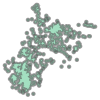

In [18]:
# plot overlapping buffers
from shapely.ops import unary_union
polygons = cpr_gdf.geometry
gdfu = polygons.unary_union
gdfu

In [21]:
# groupby month
locust_grouped = cpr_gdf.copy()
locust_grouped.index = pd.to_datetime(locust_grouped['STARTDATE'],format='%m/%d/%y')
locust_grouped = locust_grouped[['OBJECTID', 'geometry']]
locust_grouped = locust_grouped.groupby(by=[locust_grouped.index.month, locust_grouped.index.year])
#locust_grouped = locust_gdf_filtered.groupby(pd.Grouper(freq='M'))
print(locust_grouped.head(2))

            OBJECTID                                           geometry
STARTDATE                                                              
2009-08-01     21302  POLYGON ((39.95045 12.88428, 39.94874 12.86231...
2009-08-03     21303  POLYGON ((39.83071 11.83374, 39.82906 11.81177...
2009-07-29     21305  POLYGON ((39.88146 12.41261, 39.87978 12.39063...
2009-07-31     21306  POLYGON ((39.96461 12.87482, 39.96289 12.85286...
2009-06-14     21352  POLYGON ((38.69500 11.72886, 38.69345 11.70683...
2009-06-16     21353  POLYGON ((37.96184 11.61282, 37.96035 11.59076...
2013-12-04     21697  POLYGON ((48.96858 11.22130, 48.96632 11.20006...
2014-04-05     21959  POLYGON ((43.08769 9.98793, 43.08593 9.96614, ...
2014-03-17     21961  POLYGON ((43.34463 10.63148, 43.34281 10.60971...
2014-03-17     21962  POLYGON ((43.45468 10.80100, 43.45284 10.77925...
2014-05-01     21971  POLYGON ((39.47515 8.44188, 39.47370 8.41987, ...
2014-05-01     21972  POLYGON ((39.26245 8.41951, 39.26101 8.397

In [28]:
one_month = pd.DataFrame()

for group_name, df_group in locust_grouped:

    print('\nCREATE TABLE {}('.format(group_name))
    print(len(df_group))
    month = df_group
    one_month = one_month.append(month)
    break

one_month.head()


CREATE TABLE (1, 2014)(
1


,OBJECTID,geometry
STARTDATE,,
2014-01-26,22049,"POLYGON ((43.47541 11.40862, 43.47352 11.38687..."


In [142]:
gdf_districts_filtered.head()

,GID_2,geometry
0,KEN.1.1_1,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN.1.2_1,"POLYGON ((35.80651 0.31642, 35.80780 0.31627, ..."
2,KEN.1.3_1,"POLYGON ((35.81394 0.60442, 35.81377 0.60363, ..."
3,KEN.1.4_1,"POLYGON ((36.25757 0.38328, 36.25766 0.38242, ..."
4,KEN.1.5_1,"POLYGON ((35.84734 -0.07654, 35.84637 -0.07804..."



CREATE TABLE (1, 2014)(
1
                                            geometry       date
0  POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
final geodataframe
263
                                             geometry       date
0   POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
0   POLYGON ((38.97367 -2.34905, 38.97269 -2.37111... 2020-01-01
1   POLYGON ((37.57410 -1.83277, 37.57307 -1.85487... 2020-01-01
2   POLYGON ((39.85644 -0.44979, 39.85539 -0.47180... 2020-01-01
3   POLYGON ((37.15749 -1.18300, 37.15644 -1.20512... 2020-01-01
..                                                ...        ...
15  POLYGON ((45.83110 6.54932, 45.82948 6.52773, ... 2019-12-01
16  POLYGON ((45.78095 6.08502, 45.77937 6.06343, ... 2019-12-01
17  POLYGON ((44.94975 5.87487, 44.93621 5.86310, ... 2019-12-01
18  POLYGON ((45.34703 4.56911, 45.33632 4.55767, ... 2019-12-01
19  POLYGON ((46.83612 6.12760, 46.83450 6.10611, ... 2019-12-01

[263 rows x 2 columns]

CREATE TABLE (1, 

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\plotting.py:503: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


final geodataframe
263
                                             geometry       date
0   POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
0   POLYGON ((38.97367 -2.34905, 38.97269 -2.37111... 2020-01-01
1   POLYGON ((37.57410 -1.83277, 37.57307 -1.85487... 2020-01-01
2   POLYGON ((39.85644 -0.44979, 39.85539 -0.47180... 2020-01-01
3   POLYGON ((37.15749 -1.18300, 37.15644 -1.20512... 2020-01-01
..                                                ...        ...
15  POLYGON ((45.83110 6.54932, 45.82948 6.52773, ... 2019-12-01
16  POLYGON ((45.78095 6.08502, 45.77937 6.06343, ... 2019-12-01
17  POLYGON ((44.94975 5.87487, 44.93621 5.86310, ... 2019-12-01
18  POLYGON ((45.34703 4.56911, 45.33632 4.55767, ... 2019-12-01
19  POLYGON ((46.83612 6.12760, 46.83450 6.10611, ... 2019-12-01

[263 rows x 2 columns]

CREATE TABLE (10, 2014)(
2
                                            geometry       date
0  POLYGON ((40.54218 11.30740, 40.52413 11.29735... 2014-10-01


C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\plotting.py:503: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


final geodataframe
263
                                             geometry       date
0   POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
0   POLYGON ((38.97367 -2.34905, 38.97269 -2.37111... 2020-01-01
1   POLYGON ((37.57410 -1.83277, 37.57307 -1.85487... 2020-01-01
2   POLYGON ((39.85644 -0.44979, 39.85539 -0.47180... 2020-01-01
3   POLYGON ((37.15749 -1.18300, 37.15644 -1.20512... 2020-01-01
..                                                ...        ...
15  POLYGON ((45.83110 6.54932, 45.82948 6.52773, ... 2019-12-01
16  POLYGON ((45.78095 6.08502, 45.77937 6.06343, ... 2019-12-01
17  POLYGON ((44.94975 5.87487, 44.93621 5.86310, ... 2019-12-01
18  POLYGON ((45.34703 4.56911, 45.33632 4.55767, ... 2019-12-01
19  POLYGON ((46.83612 6.12760, 46.83450 6.10611, ... 2019-12-01

[263 rows x 2 columns]

CREATE TABLE (10, 2019)(
28
                                            geometry       date
0  POLYGON ((44.85086 6.64439, 44.84927 6.62273, ... 2019-10-01
1  POLYGON ((45.

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\plotting.py:503: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


final geodataframe
263
                                             geometry       date
0   POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
0   POLYGON ((38.97367 -2.34905, 38.97269 -2.37111... 2020-01-01
1   POLYGON ((37.57410 -1.83277, 37.57307 -1.85487... 2020-01-01
2   POLYGON ((39.85644 -0.44979, 39.85539 -0.47180... 2020-01-01
3   POLYGON ((37.15749 -1.18300, 37.15644 -1.20512... 2020-01-01
..                                                ...        ...
15  POLYGON ((45.83110 6.54932, 45.82948 6.52773, ... 2019-12-01
16  POLYGON ((45.78095 6.08502, 45.77937 6.06343, ... 2019-12-01
17  POLYGON ((44.94975 5.87487, 44.93621 5.86310, ... 2019-12-01
18  POLYGON ((45.34703 4.56911, 45.33632 4.55767, ... 2019-12-01
19  POLYGON ((46.83612 6.12760, 46.83450 6.10611, ... 2019-12-01

[263 rows x 2 columns]

CREATE TABLE (11, 2019)(
66
                                            geometry       date
0  POLYGON ((45.27252 9.32561, 45.27068 9.30399, ... 2019-11-01
1  POLYGON ((40.

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\plotting.py:503: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


final geodataframe
263
                                             geometry       date
0   POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
0   POLYGON ((38.97367 -2.34905, 38.97269 -2.37111... 2020-01-01
1   POLYGON ((37.57410 -1.83277, 37.57307 -1.85487... 2020-01-01
2   POLYGON ((39.85644 -0.44979, 39.85539 -0.47180... 2020-01-01
3   POLYGON ((37.15749 -1.18300, 37.15644 -1.20512... 2020-01-01
..                                                ...        ...
15  POLYGON ((45.83110 6.54932, 45.82948 6.52773, ... 2019-12-01
16  POLYGON ((45.78095 6.08502, 45.77937 6.06343, ... 2019-12-01
17  POLYGON ((44.94975 5.87487, 44.93621 5.86310, ... 2019-12-01
18  POLYGON ((45.34703 4.56911, 45.33632 4.55767, ... 2019-12-01
19  POLYGON ((46.83612 6.12760, 46.83450 6.10611, ... 2019-12-01

[263 rows x 2 columns]

CREATE TABLE (12, 2013)(
1
                                            geometry       date
0  POLYGON ((48.96858 11.22130, 48.96632 11.20006... 2013-12-01


C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\plotting.py:503: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


final geodataframe
263
                                             geometry       date
0   POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
0   POLYGON ((38.97367 -2.34905, 38.97269 -2.37111... 2020-01-01
1   POLYGON ((37.57410 -1.83277, 37.57307 -1.85487... 2020-01-01
2   POLYGON ((39.85644 -0.44979, 39.85539 -0.47180... 2020-01-01
3   POLYGON ((37.15749 -1.18300, 37.15644 -1.20512... 2020-01-01
..                                                ...        ...
15  POLYGON ((45.83110 6.54932, 45.82948 6.52773, ... 2019-12-01
16  POLYGON ((45.78095 6.08502, 45.77937 6.06343, ... 2019-12-01
17  POLYGON ((44.94975 5.87487, 44.93621 5.86310, ... 2019-12-01
18  POLYGON ((45.34703 4.56911, 45.33632 4.55767, ... 2019-12-01
19  POLYGON ((46.83612 6.12760, 46.83450 6.10611, ... 2019-12-01

[263 rows x 2 columns]

CREATE TABLE (12, 2019)(
78
                                            geometry       date
0  POLYGON ((45.71947 2.76428, 45.71818 2.74267, ... 2019-12-01
1  POLYGON ((41.

C:\Users\ioanna.papachristou\AppData\Local\Continuum\anaconda3.7\lib\site-packages\geopandas\plotting.py:503: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


final geodataframe
263
                                             geometry       date
0   POLYGON ((43.47541 11.40862, 43.47352 11.38687... 2014-01-01
0   POLYGON ((38.97367 -2.34905, 38.97269 -2.37111... 2020-01-01
1   POLYGON ((37.57410 -1.83277, 37.57307 -1.85487... 2020-01-01
2   POLYGON ((39.85644 -0.44979, 39.85539 -0.47180... 2020-01-01
3   POLYGON ((37.15749 -1.18300, 37.15644 -1.20512... 2020-01-01
..                                                ...        ...
15  POLYGON ((45.83110 6.54932, 45.82948 6.52773, ... 2019-12-01
16  POLYGON ((45.78095 6.08502, 45.77937 6.06343, ... 2019-12-01
17  POLYGON ((44.94975 5.87487, 44.93621 5.86310, ... 2019-12-01
18  POLYGON ((45.34703 4.56911, 45.33632 4.55767, ... 2019-12-01
19  POLYGON ((46.83612 6.12760, 46.83450 6.10611, ... 2019-12-01

[263 rows x 2 columns]


,geometry,date
0,"POLYGON ((43.47541 11.40862, 43.47352 11.38687...",2014-01-01
0,"POLYGON ((38.97367 -2.34905, 38.97269 -2.37111...",2020-01-01
1,"POLYGON ((37.57410 -1.83277, 37.57307 -1.85487...",2020-01-01
2,"POLYGON ((39.85644 -0.44979, 39.85539 -0.47180...",2020-01-01
3,"POLYGON ((37.15749 -1.18300, 37.15644 -1.20512...",2020-01-01


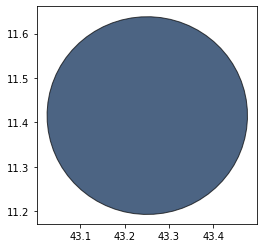

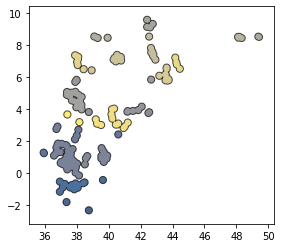

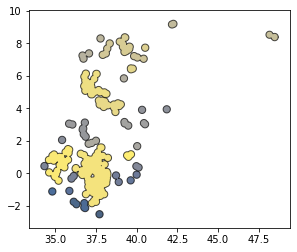

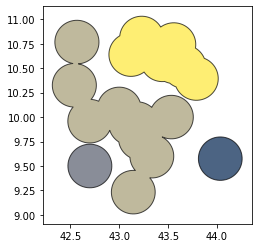

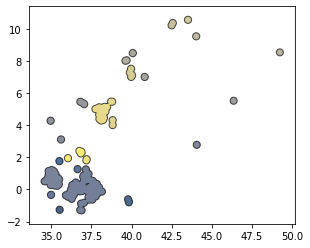

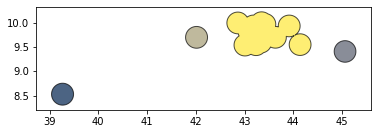

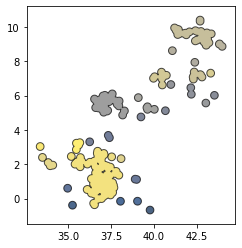

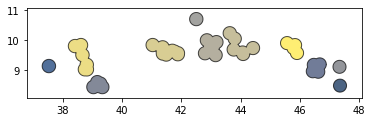

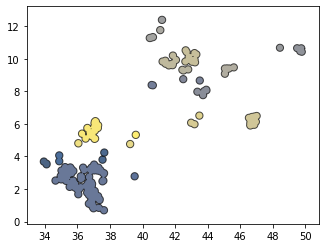

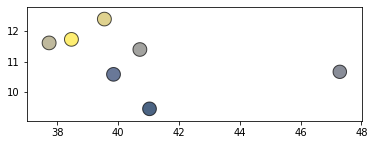

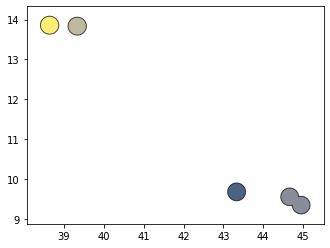

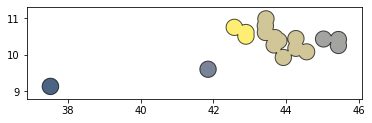

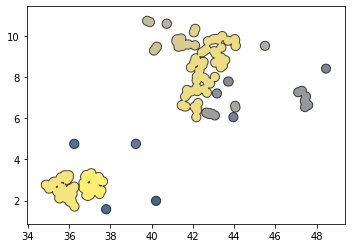

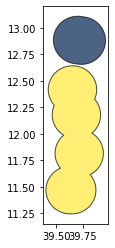

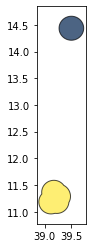

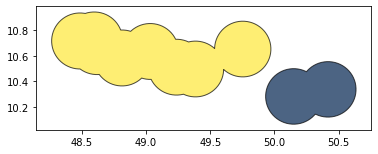

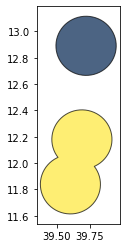

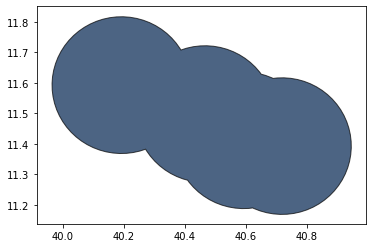

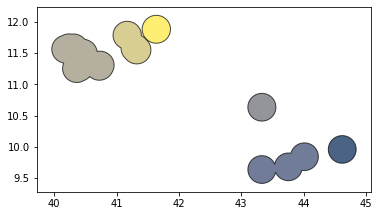

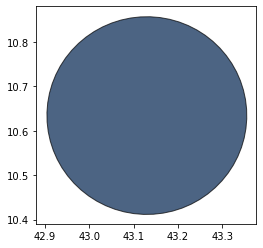

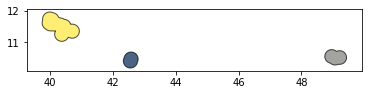

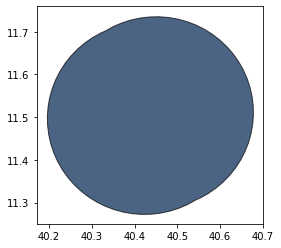

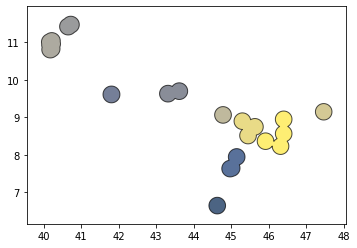

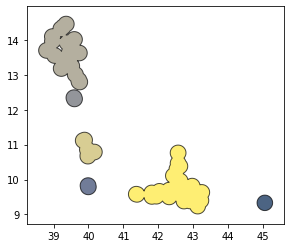

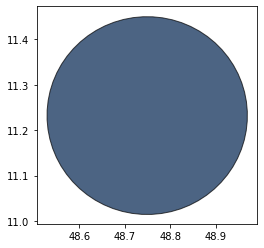

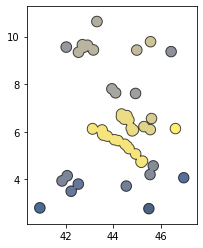

In [60]:
# iterate over each group
locust_buffers = pd.DataFrame()
i = 0

for group_name, df_group in locust_grouped:

    print('\nCREATE TABLE {}('.format(group_name))
    print(len(df_group))
    #print(df_group.head())
    #crs = {'init': 'epsg:4326'}
    #geometry = df_group['geometry']
    #gdf = gpd.GeoDataFrame(df_group, crs=crs, geometry=geometry)
    
    
    #try:
    #no locust per district
    #no_locust_ditr = gpd.overlay(gdf_districts_filtered, df_group, how='difference')
    #locust_buffers_union = gpd.overlay(df_group, df_group, how='union')
    
    geoms = df_group.geometry.unary_union
    df_group = geopandas.GeoDataFrame(geometry=[geoms])
    df_group = df_group.explode().reset_index(drop=True)
    
    #print("locust buffers")
    #print(locust_buffers_union.head())
    #locust per district
    #locust_distr = gpd.overlay(gdf_districts_filtered, locust_buffers_union, how='intersect')
    #add date column
    df_group['date'] = str(group_name[1]) + '-' + str(group_name[0])
    df_group['date'] = pd.to_datetime(df_group['date'])
    #locust_buffers_union = locust_buffers_union['date', 'geometry']
    print(df_group.head())
    
    df_group.plot(cmap='cividis', alpha=0.7, edgecolor='black')
    
    #append to dataframe
    locust_buffers = locust_buffers.append(df_group)
    print("final geodataframe")
    print(len(locust_per_district))
    print(locust_per_district)
    #i += 1
    
    #if len(locust_buffers_union) > len(df_group):
     #   break

    #except ValueError:
     #   print("Intersection in group {} could not be completed".format(group_name))
      #  pass
    
locust_buffers.head()

In [47]:
#df = df_group[0:10]

(263, 2)


,geometry,date
0,"POLYGON ((43.47541 11.40862, 43.47352 11.38687...",2014-01-01
0,"POLYGON ((38.97367 -2.34905, 38.97269 -2.37111...",2020-01-01
1,"POLYGON ((37.57410 -1.83277, 37.57307 -1.85487...",2020-01-01
2,"POLYGON ((39.85644 -0.44979, 39.85539 -0.47180...",2020-01-01
3,"POLYGON ((37.15749 -1.18300, 37.15644 -1.20512...",2020-01-01


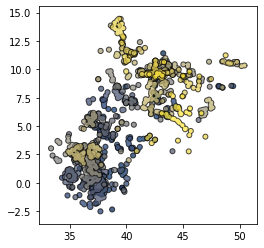

In [61]:
print(locust_buffers.shape)
locust_buffers.plot(cmap='cividis', alpha=0.7, edgecolor='black')
locust_buffers.head()

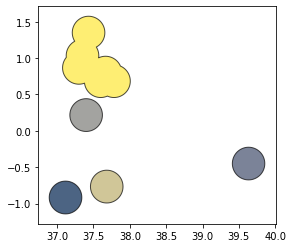

In [48]:
#geoms = df.geometry.unary_union
#df = geopandas.GeoDataFrame(geometry=[geoms])

#df = df.explode().reset_index(drop=True)

#df.plot(cmap='cividis', alpha=0.7, edgecolor='black')

In [43]:
#df_union = gpd.overlay(df, df, how='union')
#print(df_union.shape)
#df_union

(34, 3)


,OBJECTID_1,OBJECTID_2,geometry
0,24676.0,24679.0,"POLYGON ((37.52278 0.88982, 37.50820 0.87367, ..."
1,24677.0,24679.0,"POLYGON ((37.37794 0.65549, 37.37707 0.66144, ..."
2,24679.0,24679.0,"POLYGON ((37.52402 0.86640, 37.52292 0.84430, ..."
3,24683.0,24679.0,"POLYGON ((37.46130 0.71042, 37.45965 0.71394, ..."
4,24676.0,24676.0,"POLYGON ((37.57402 1.03302, 37.57291 1.01092, ..."
5,24677.0,24676.0,"POLYGON ((37.42226 0.82014, 37.42700 0.82656, ..."
6,24678.0,24676.0,"POLYGON ((37.54025 1.15195, 37.53860 1.15096, ..."
7,24679.0,24676.0,"POLYGON ((37.12716 1.01020, 37.14174 1.02636, ..."
8,24683.0,24676.0,"POLYGON ((37.44483 0.82932, 37.44704 0.84424, ..."
9,24676.0,24678.0,"POLYGON ((37.24302 1.23141, 37.24466 1.23240, ..."


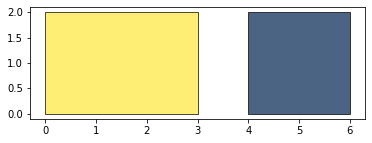

In [53]:
from shapely.affinity import translate
from shapely.geometry import Polygon
import matplotlib as plt
import geopandas

p0 = Polygon( [(0,0), (2,0), (2,2), (0,2)] )
p1 = translate(p0, xoff=1)
p2 = translate(p0, xoff=4)

df = geopandas.GeoDataFrame(geometry=[
    p0, p1, p2
])

geoms = df.geometry.unary_union
df = geopandas.GeoDataFrame(geometry=[geoms])

df = df.explode().reset_index(drop=True)

df.plot(cmap='cividis', alpha=0.7, edgecolor='black')

In [40]:
#df_union.geometry.unique()

<GeometryArray>
Length: 31, dtype: geometry

In [36]:
#df_group

,OBJECTID,geometry
STARTDATE,,
2020-01-27,24676,"POLYGON ((37.57402 1.03302, 37.57291 1.01092, ..."
2020-01-27,24677,"POLYGON ((37.82392 0.68311, 37.82282 0.66102, ..."
2020-01-27,24678,"POLYGON ((37.65735 1.34958, 37.65623 1.32748, ..."
2020-01-27,24679,"POLYGON ((37.52402 0.86640, 37.52292 0.84430, ..."
2020-01-27,24680,"POLYGON ((37.62397 0.21660, 37.62288 0.19450, ..."
...,...,...
2020-01-31,25348,"POLYGON ((37.59784 4.88627, 37.59661 4.86418, ..."
2020-01-22,25349,"POLYGON ((43.91763 5.82902, 43.91614 5.80728, ..."
2020-01-22,25350,"POLYGON ((38.52221 4.75962, 38.52095 4.73756, ..."


In [35]:
#locust_buffers_union

,OBJECTID_1,OBJECTID_2,geometry,date
0,24676.0,25094.0,"POLYGON ((37.37939 0.81001, 37.37169 0.80887, ...",2020-01-01
1,24677.0,25094.0,"POLYGON ((37.51152 0.47634, 37.49426 0.48458, ...",2020-01-01
2,24679.0,25094.0,"POLYGON ((37.48702 0.74266, 37.48614 0.74118, ...",2020-01-01
3,24680.0,25094.0,"POLYGON ((37.24600 0.38017, 37.25795 0.39106, ...",2020-01-01
4,24683.0,25094.0,"POLYGON ((37.54307 0.61206, 37.54206 0.61267, ...",2020-01-01
...,...,...,...,...
3059,NaN,25340.0,"MULTIPOLYGON (((38.23754 6.90367, 38.23422 6.8...",2020-01-01
3060,NaN,25341.0,"POLYGON ((37.47483 4.59136, 37.47483 4.59136, ...",2020-01-01
3061,NaN,25343.0,"MULTIPOLYGON (((37.99948 7.56500, 38.00297 7.5...",2020-01-01
3062,NaN,25348.0,"POLYGON ((37.38170 4.66271, 37.37162 4.66227, ...",2020-01-01


In [168]:
#locust_per_district = locust_per_district.reset_index()
#locust_per_district = locust_per_district[['date', 'geometry']]
#print(locust_per_district.shape)
#locust_per_district.head()

(147465, 2)


,date,geometry
0,2014-01-01,"POLYGON ((43.47541 11.40862, 43.47352 11.38687..."
1,2020-01-01,"POLYGON ((37.37939 0.81001, 37.37169 0.80887, ..."
2,2020-01-01,"POLYGON ((37.51152 0.47634, 37.49426 0.48458, ..."
3,2020-01-01,"POLYGON ((37.48702 0.74266, 37.48614 0.74118, ..."
4,2020-01-01,"POLYGON ((37.24600 0.38017, 37.25795 0.39106, ..."


In [180]:
#locust_per_district['Id'] = locust_per_district.index
#locust_per_district = locust_per_district[['Id', 'date', 'geometry']]
#print()
#print(locust_per_district.head())

    Id       date                                           geometry
0    0 2014-01-01  POLYGON ((43.47541 11.40862, 43.47352 11.38687...
1    1 2020-01-01  POLYGON ((37.37939 0.81001, 37.37169 0.80887, ...
2    2 2020-01-01  POLYGON ((37.51152 0.47634, 37.49426 0.48458, ...
3    3 2020-01-01  POLYGON ((37.48702 0.74266, 37.48614 0.74118, ...
4    4 2020-01-01  POLYGON ((37.24600 0.38017, 37.25795 0.39106, ...
..  ..        ...                                                ...
95  95 2020-01-01  POLYGON ((37.45737 0.79976, 37.45627 0.77766, ...
96  96 2020-01-01  POLYGON ((37.49360 0.86038, 37.49190 0.85883, ...
97  97 2020-01-01  POLYGON ((37.44401 0.94031, 37.44098 0.94257, ...
98  98 2020-01-01  POLYGON ((37.42721 0.61061, 37.42709 0.61143, ...
99  99 2020-01-01  POLYGON ((37.20744 0.61649, 37.20634 0.59438, ...

[100 rows x 3 columns]


In [57]:
crs = {'init': 'epsg:4326'}
geometry = locust_buffer['geometry']
locust_buffers_gdf = gpd.GeoDataFrame(locust_buffer, crs=crs, geometry=geometry)

In [187]:
#test = locust_buffers_gdf[0:1]
#print(test)

   ID       date                                           geometry  Id
0   0 2014-01-01  POLYGON ((43.47541 11.40862, 43.47352 11.38687...   0


In [65]:
#Intersect locust buffers with districts
gdf_districts_filtered = gdf_districts[['GID_2', 'geometry']]
locust_distr = gpd.overlay(locust_buffers_gdf, gdf_districts_filtered, how='intersection')
locust_distr.head()

,date,GID_2,geometry
0,2014-01-01,SOM.1.4_1,"MULTIPOLYGON (((43.45153 11.43292, 43.45156 11..."
1,2014-03-01,SOM.1.4_1,"POLYGON ((42.79228 10.78345, 42.79252 10.78144..."
2,2014-03-01,SOM.1.4_1,"POLYGON ((43.10157 10.41719, 43.09039 10.41809..."
3,2020-03-01,SOM.1.4_1,"POLYGON ((42.70932 10.55680, 42.71851 10.54960..."
4,2020-04-01,SOM.1.4_1,"POLYGON ((42.70777 10.62147, 42.71239 10.62110..."


In [21]:
# calculate geometries of districts with no locusts (overlay the difference between the 2)
#no_locust_ditr = gpd.overlay(gdf_districts_filtered, cpr_gdf, how='difference')
#no_locust_ditr.head()

,GID_2,geometry
0,KEN.1.1_1,"POLYGON ((35.87727 -0.02973, 35.87699 -0.02947..."
1,KEN.1.2_1,"POLYGON ((35.80651 0.31642, 35.80780 0.31627, ..."
2,KEN.1.3_1,"MULTIPOLYGON (((35.99579 0.76133, 35.99862 0.7..."
3,KEN.1.4_1,"MULTIPOLYGON (((36.02683 0.30607, 36.01920 0.3..."
4,KEN.1.5_1,"POLYGON ((35.84734 -0.07654, 35.84637 -0.07804..."


In [23]:
#now calculating the district areas containing locust (overlay the difference between district area with no locust, and total district area)
#locust_distr = gpd.overlay(gdf_districts_filtered, no_locust_ditr, how='difference')
#locust_distr.head()

,GID_2,geometry
0,KEN.1.1_1,"MULTIPOLYGON (((35.96057 -0.02265, 35.96057 -0..."
1,KEN.1.2_1,"POLYGON ((35.72707 0.21981, 35.72247 0.21714, ..."
2,KEN.1.3_1,"POLYGON ((35.79813 0.58457, 35.79647 0.58446, ..."
3,KEN.1.4_1,"POLYGON ((36.25757 0.38328, 36.25766 0.38242, ..."
4,KEN.1.5_1,"MULTIPOLYGON (((35.77686 -0.17996, 35.77686 -0..."


In [24]:
# Intersection between districts and locust buffers: no merge on buffers
#res_intersection = gpd.overlay(gdf_districts_filtered, cpr_gdf, how='intersection')
#res_intersection.head()

,GID_2,OBJECTID,STARTDATE,LOCNAME,AREAHA,LOCRELIAB,COUNTRYID,LOCUSTID,REPORTID,ACOMMENT,LOCPRESENT,area_m,area_d,geometry
0,KEN.1.1_1,25901,2020-02-03,Bahati,100.0,Exact,KE,434112.0,RAMSES38_KEN20-19.XL,None,1.0,1.960343e+09,0.158908,"MULTIPOLYGON (((35.96057 -0.02265, 35.96073 -0..."
1,KEN.1.6_1,25901,2020-02-03,Bahati,100.0,Exact,KE,434112.0,RAMSES38_KEN20-19.XL,None,1.0,1.960343e+09,0.158908,"POLYGON ((36.10752 0.05752, 36.10768 0.05634, ..."
2,KEN.20.3_1,25901,2020-02-03,Bahati,100.0,Exact,KE,434112.0,RAMSES38_KEN20-19.XL,None,1.0,1.960343e+09,0.158908,"POLYGON ((36.27633 0.00726, 36.27585 0.00714, ..."
3,KEN.31.1_1,25901,2020-02-03,Bahati,100.0,Exact,KE,434112.0,RAMSES38_KEN20-19.XL,None,1.0,1.960343e+09,0.158908,"POLYGON ((36.15834 -0.31505, 36.15699 -0.30980..."
4,KEN.31.2_1,25901,2020-02-03,Bahati,100.0,Exact,KE,434112.0,RAMSES38_KEN20-19.XL,None,1.0,1.960343e+09,0.158908,"POLYGON ((36.15465 -0.39145, 36.15458 -0.38653..."


In [66]:
#intersect with forageland
forage_locust_district = gpd.overlay(forageland_v, locust_distr, how='intersection')
forage_locust_district.head()

,fid,forage_vec,date,GID_2,geometry
0,5.0,100,2019-06-01,SOM.18.2_1,"POLYGON ((43.82872 9.72176, 43.82644 9.72265, ..."
1,5.0,100,2014-03-01,SOM.1.1_1,"POLYGON ((43.35805 10.13854, 43.36450 10.14660..."
2,5.0,100,2014-05-01,ETH.9.9_1,"POLYGON ((42.70105 9.84031, 42.69944 9.84185, ..."
3,5.0,100,2014-04-01,ETH.9.9_1,"POLYGON ((42.70105 9.84031, 42.69944 9.84185, ..."
4,5.0,100,2019-08-01,SOM.18.1_1,"POLYGON ((44.84439 9.94844, 44.84253 9.92679, ..."


In [67]:
forage_locust_district['forage_locust_area'] = forage_locust_district.geometry.area
forage_locust_district.head()

,fid,forage_vec,date,GID_2,geometry,forage_locust_area
0,5.0,100,2019-06-01,SOM.18.2_1,"POLYGON ((43.82872 9.72176, 43.82644 9.72265, ...",0.135346
1,5.0,100,2014-03-01,SOM.1.1_1,"POLYGON ((43.35805 10.13854, 43.36450 10.14660...",0.082834
2,5.0,100,2014-05-01,ETH.9.9_1,"POLYGON ((42.70105 9.84031, 42.69944 9.84185, ...",0.035133
3,5.0,100,2014-04-01,ETH.9.9_1,"POLYGON ((42.70105 9.84031, 42.69944 9.84185, ...",0.035133
4,5.0,100,2019-08-01,SOM.18.1_1,"POLYGON ((44.84439 9.94844, 44.84253 9.92679, ...",0.062758


In [69]:
forage_locust_district['measureID'] = 29
forage_locust_district['factID'] = 'FOR_LOC_DIS' + forage_locust_district.index.astype(str)
forage_locust_district['locationID'] = forage_locust_district['GID_2']
forage_locust_district['value'] = forage_locust_district['forage_locust_area']

forage_locust_district.head()

,fid,forage_vec,date,GID_2,geometry,forage_locust_area,measureID,factID,locationID,value
0,5.0,100,2019-06-01,SOM.18.2_1,"POLYGON ((43.82872 9.72176, 43.82644 9.72265, ...",0.135346,29,FOR_LOC_DIS0,SOM.18.2_1,0.135346
1,5.0,100,2014-03-01,SOM.1.1_1,"POLYGON ((43.35805 10.13854, 43.36450 10.14660...",0.082834,29,FOR_LOC_DIS1,SOM.1.1_1,0.082834
2,5.0,100,2014-05-01,ETH.9.9_1,"POLYGON ((42.70105 9.84031, 42.69944 9.84185, ...",0.035133,29,FOR_LOC_DIS2,ETH.9.9_1,0.035133
3,5.0,100,2014-04-01,ETH.9.9_1,"POLYGON ((42.70105 9.84031, 42.69944 9.84185, ...",0.035133,29,FOR_LOC_DIS3,ETH.9.9_1,0.035133
4,5.0,100,2019-08-01,SOM.18.1_1,"POLYGON ((44.84439 9.94844, 44.84253 9.92679, ...",0.062758,29,FOR_LOC_DIS4,SOM.18.1_1,0.062758


In [70]:
forage_locust_district = forage_locust_district.merge(dates, on='date', how='left')
forage_locust_district = forage_locust_district[['factID', 'measureID', 'dateID', 'locationID', 'value']]
forage_locust_district.head()

,factID,measureID,dateID,locationID,value
0,FOR_LOC_DIS0,29,20190106,SOM.18.2_1,0.135346
1,FOR_LOC_DIS1,29,20140103,SOM.1.1_1,0.082834
2,FOR_LOC_DIS2,29,20140105,ETH.9.9_1,0.035133
3,FOR_LOC_DIS3,29,20140104,ETH.9.9_1,0.035133
4,FOR_LOC_DIS4,29,20190108,SOM.18.1_1,0.062758


In [71]:
# Export to parquet
forage_locust_district.to_parquet('Forage_impact_locust_district_20200710.parquet',
              compression='uncompressed', index = False)

In [72]:
# Export to csv
forage_locust_district.to_csv('Forage_impact_locust_district_20200710.csv', sep='|', encoding='utf-8', index = False)

## Intersect with crops

In [73]:
# Import cropland vector
crops = gpd.read_file("git/Locust-Covid19/my_package/data/input/crops/Crops_vectorized.shp")
print(crops.head())

   fid  Crops                                           geometry
0  1.0      0  POLYGON ((37.77539 14.67733, 37.78475 14.67696...
1  2.0      0  POLYGON ((37.79349 14.66769, 37.80286 14.66732...
2  3.0      1  POLYGON ((37.83906 14.64804, 37.84842 14.64768...
3  4.0      1  POLYGON ((37.72551 14.63462, 37.73487 14.63425...
4  5.0      1  POLYGON ((37.88462 14.62839, 37.89398 14.62803...


In [74]:
crops = crops[crops['Crops'] == 1]
crops.Crops = 12
crops.head()

,fid,Crops,geometry
2,3.0,12,"POLYGON ((37.83906 14.64804, 37.84842 14.64768..."
3,4.0,12,"POLYGON ((37.72551 14.63462, 37.73487 14.63425..."
4,5.0,12,"POLYGON ((37.88462 14.62839, 37.89398 14.62803..."
5,6.0,12,"POLYGON ((37.90335 14.62766, 37.91271 14.62729..."
6,7.0,12,"POLYGON ((37.76984 14.59717, 37.77920 14.59680..."


In [85]:
crops_locust_district = gpd.overlay(crops, locust_distr, how='intersection')
crops_locust_district.head()

,fid,Crops,date,GID_2,geometry
0,41.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.32005 14.34695, 39.32942 14.34656..."
1,65.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.22299 14.30486, 39.22245 14.29751..."
2,71.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.37230 14.29128, 39.38167 14.29089..."
3,80.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.38036 14.27312, 39.38972 14.27273..."
4,95.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.36031 14.25614, 39.36968 14.25575..."


In [86]:
crops_locust_district['crops_locust_area'] = crops_locust_district.geometry.area
crops_locust_district.head()

,fid,Crops,date,GID_2,geometry,crops_locust_area
0,41.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.32005 14.34695, 39.32942 14.34656...",0.000083
1,65.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.22299 14.30486, 39.22245 14.29751...",0.000018
2,71.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.37230 14.29128, 39.38167 14.29089...",0.000083
3,80.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.38036 14.27312, 39.38972 14.27273...",0.000083
4,95.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.36031 14.25614, 39.36968 14.25575...",0.000167


In [87]:
crops_locust_district['measureID'] = 30
crops_locust_district['factID'] = 'CROP_LOC_DIS' + crops_locust_district.index.astype(str)
crops_locust_district['locationID'] = crops_locust_district['GID_2']
crops_locust_district['value'] = crops_locust_district['crops_locust_area']

crops_locust_district.head()

,fid,Crops,date,GID_2,geometry,crops_locust_area,measureID,factID,locationID,value
0,41.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.32005 14.34695, 39.32942 14.34656...",0.000083,30,CROP_LOC_DIS0,ETH.11.4_1,0.000083
1,65.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.22299 14.30486, 39.22245 14.29751...",0.000018,30,CROP_LOC_DIS1,ETH.11.4_1,0.000018
2,71.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.37230 14.29128, 39.38167 14.29089...",0.000083,30,CROP_LOC_DIS2,ETH.11.4_1,0.000083
3,80.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.38036 14.27312, 39.38972 14.27273...",0.000083,30,CROP_LOC_DIS3,ETH.11.4_1,0.000083
4,95.0,12,2019-11-01,ETH.11.4_1,"POLYGON ((39.36031 14.25614, 39.36968 14.25575...",0.000167,30,CROP_LOC_DIS4,ETH.11.4_1,0.000167


In [88]:
dates = pd.read_csv("git/Locust-Covid19/my_package/data/input/date_23_06-2020.csv")
dates['date'] = pd.to_datetime(dates['date'])
dates.head()

,dateID,date
0,20000101,2000-01-01
1,20000102,2000-02-01
2,20000103,2000-03-01
3,20000104,2000-04-01
4,20000105,2000-05-01


In [89]:
crops_locust_district = crops_locust_district.merge(dates, on='date', how='left')
crops_locust_district = crops_locust_district[['factID', 'measureID', 'dateID', 'locationID', 'value']]
crops_locust_district.head()

,factID,measureID,dateID,locationID,value
0,CROP_LOC_DIS0,30,20190111,ETH.11.4_1,0.000083
1,CROP_LOC_DIS1,30,20190111,ETH.11.4_1,0.000018
2,CROP_LOC_DIS2,30,20190111,ETH.11.4_1,0.000083
3,CROP_LOC_DIS3,30,20190111,ETH.11.4_1,0.000083
4,CROP_LOC_DIS4,30,20190111,ETH.11.4_1,0.000167


In [90]:
# Export to parquet
crops_locust_district.to_parquet('Crops_impact_locust_district_20200710.parquet',
              compression='uncompressed', index = False)

In [91]:
# Export to csv
crops_locust_district.to_csv('Crops_impact_locust_district_20200710.csv', sep='|', encoding='utf-8', index = False)